In [50]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, RocCurveDisplay

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

AGEs.csv
SpecAnalysis
Untitled.ipynb
add_label.py
ages.ipynb
ann.ipynb
imodpoly_raman_spectroscopy
lda_kernel.ipynb
logs
matlab_2
matlab_raman_preprocessed
matlab_raman_preprocessed copy
matlab_raman_preprocessed copy.zip
original_raman_spectroscopy
papers
pca_kernel.ipynb
pca_svm.ipynb
plolyfit_ann-jvsc-7aedbb54-b08c-4e56-b67b-12dd5e91cff2.ipynb
plolyfit_ann.ipynb
plot
plot1.png
plot2_1.pdf
polyfit_old.ipynb
raman-spectroscopy-project.ipynb
scaling.py
testing
transform.py
visualize.ipynb


In [3]:
earData = pd.read_csv('matlab_2/earData.csv', header=None)

In [4]:
earData

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.000472,0.000763,0.000748,0.000763,0.000688,0.000681,0.000793,0.000914,0.001016,0.001111,...,0.000650,0.000604,0.000556,0.000576,0.000621,0.000655,0.000639,0.000591,0.000577,0.000562
1,0.000594,0.000940,0.001164,0.001255,0.001188,0.001105,0.001019,0.000900,0.000833,0.000818,...,0.000595,0.000520,0.000490,0.000517,0.000571,0.000635,0.000663,0.000663,0.000602,0.000574
2,0.000585,0.000711,0.000887,0.000924,0.000868,0.000812,0.000743,0.000651,0.000622,0.000655,...,0.000810,0.000717,0.000522,0.000415,0.000422,0.000554,0.000615,0.000627,0.000654,0.000354
3,0.000473,0.001088,0.001487,0.001697,0.001667,0.001614,0.001561,0.001435,0.001349,0.001335,...,0.000556,0.000576,0.000575,0.000638,0.000685,0.000673,0.000709,0.000772,0.000724,0.000791
4,0.000976,0.000756,0.000945,0.000942,0.000941,0.000932,0.000836,0.000687,0.000597,0.000599,...,0.001024,0.000985,0.000796,0.000832,0.000919,0.000942,0.000909,0.000866,0.000731,0.000661
5,0.000883,0.000659,0.000618,0.000615,0.000713,0.000778,0.000781,0.000788,0.000777,0.000739,...,0.000854,0.000824,0.000798,0.000854,0.000914,0.000932,0.000948,0.000949,0.000851,0.000803
6,0.000521,0.000793,0.001192,0.001331,0.001310,0.001285,0.001222,0.001093,0.001053,0.001064,...,0.000343,0.000350,0.000371,0.000375,0.000435,0.000589,0.000646,0.000653,0.000712,0.000484
7,0.000475,0.000839,0.000966,0.000994,0.000849,0.000710,0.000610,0.000519,0.000504,0.000567,...,0.000303,0.000257,0.000289,0.000308,0.000320,0.000337,0.000375,0.000410,0.000425,0.000568
8,0.000447,0.000722,0.000903,0.001001,0.000997,0.001002,0.001028,0.001016,0.001008,0.001009,...,0.000600,0.000601,0.000604,0.000551,0.000535,0.000612,0.000650,0.000669,0.000740,0.000642
9,0.000469,0.000843,0.001061,0.001132,0.001024,0.000932,0.000873,0.000794,0.000785,0.000841,...,0.000536,0.000418,0.000304,0.000246,0.000264,0.000373,0.000447,0.000486,0.000509,0.000364


In [5]:
earData = earData.to_numpy()

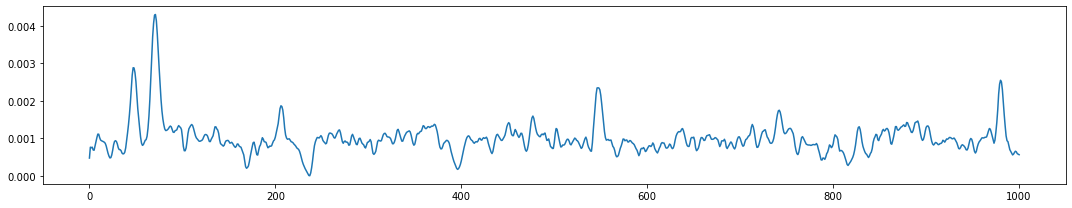

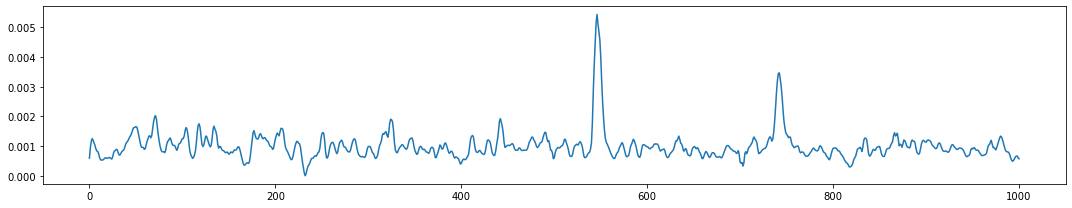

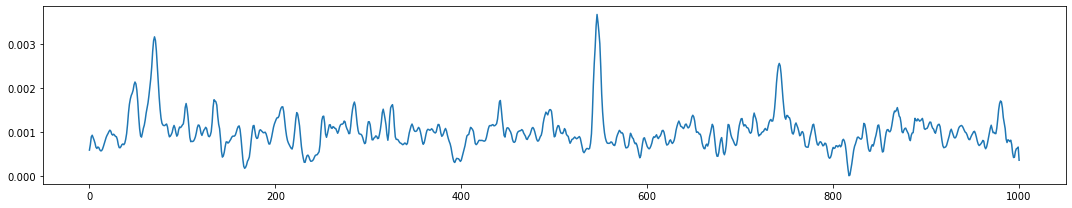

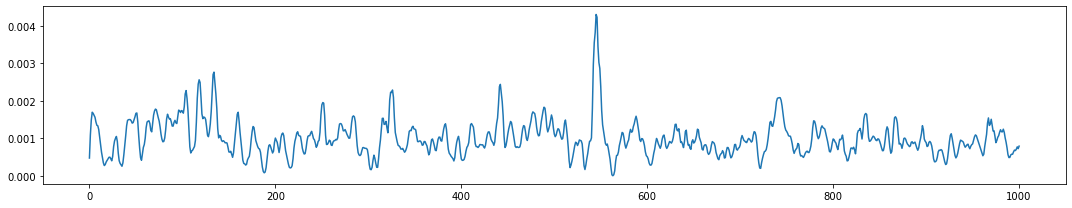

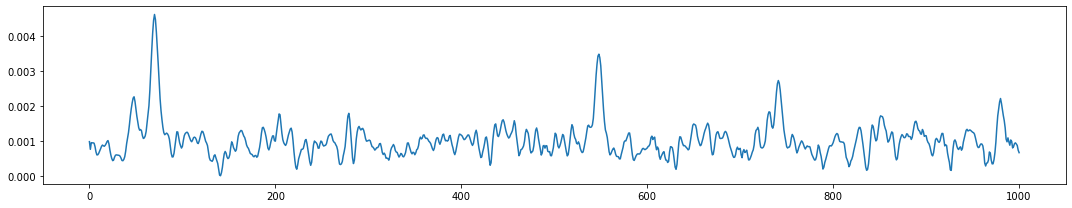

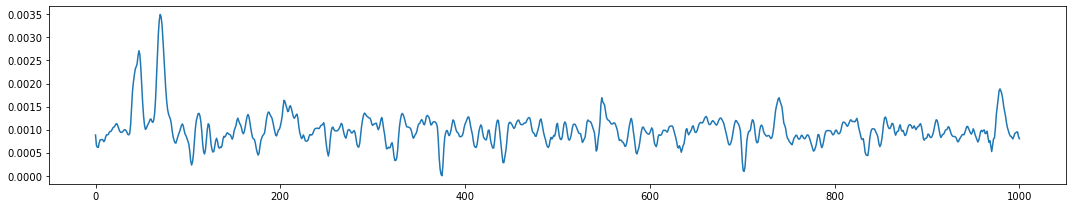

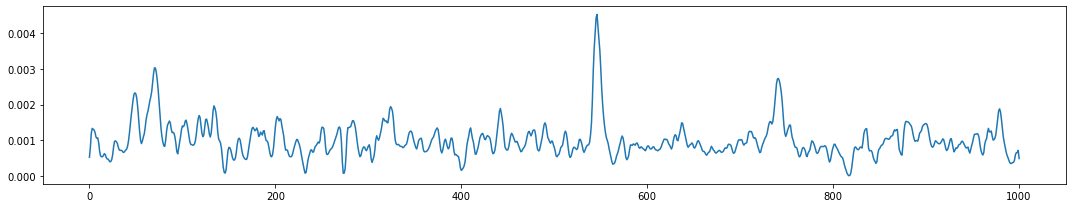

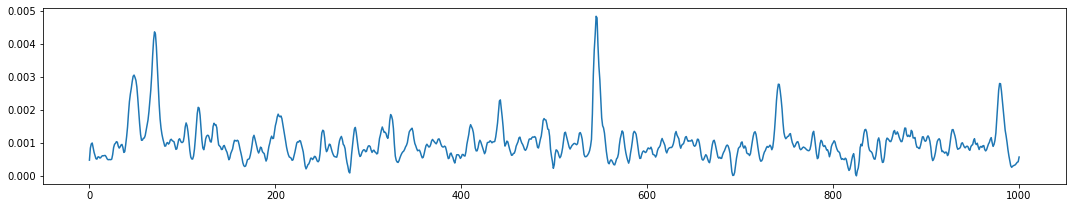

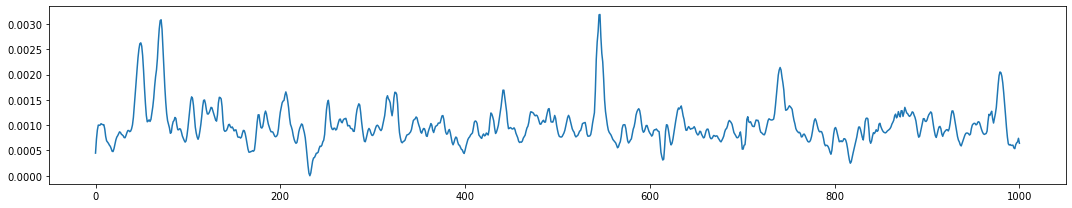

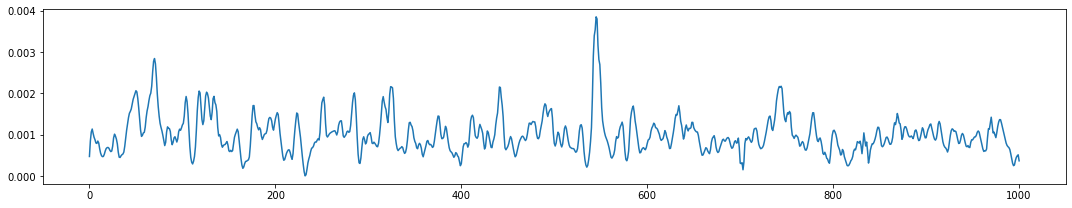

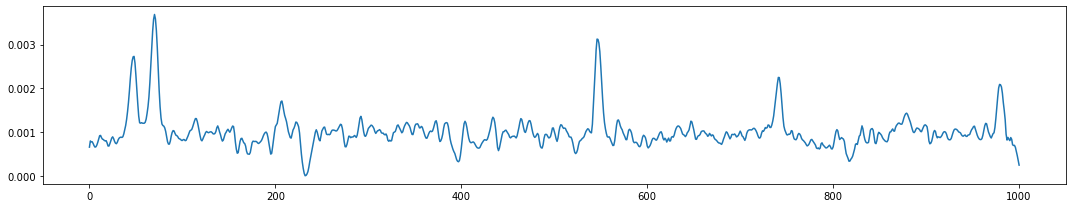

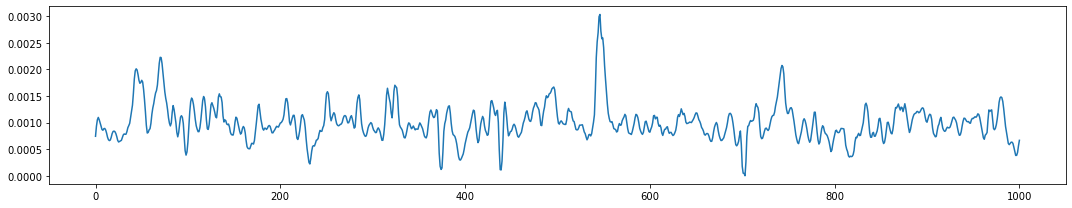

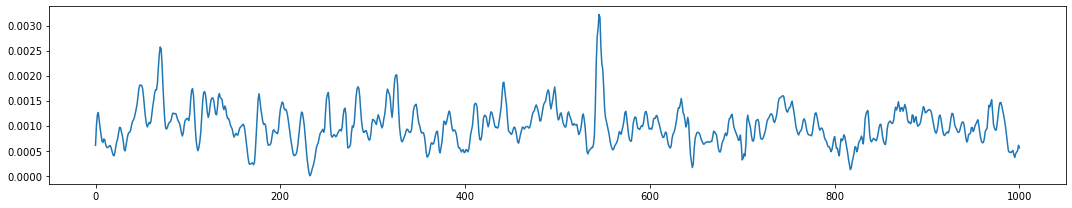

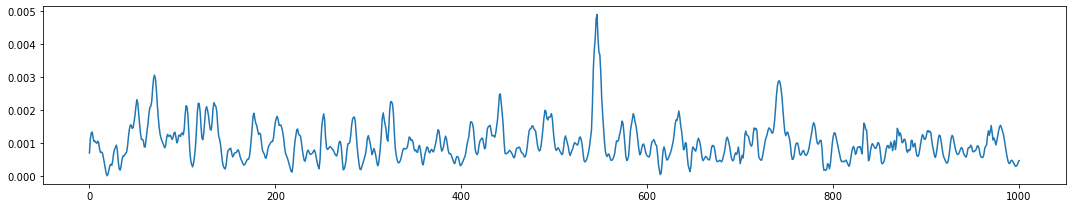

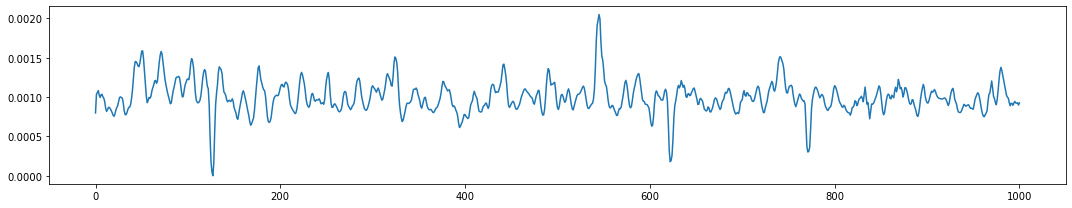

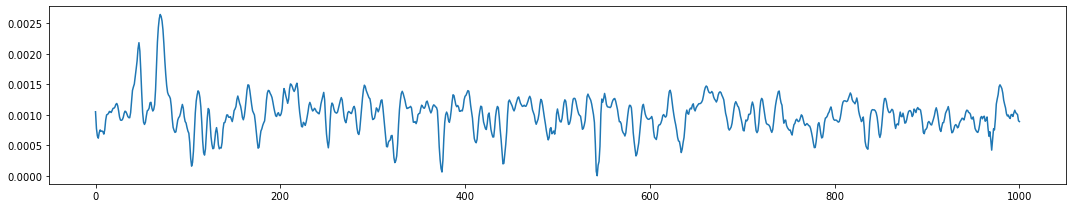

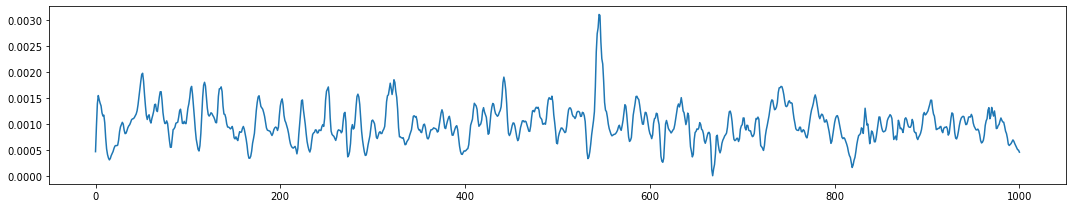

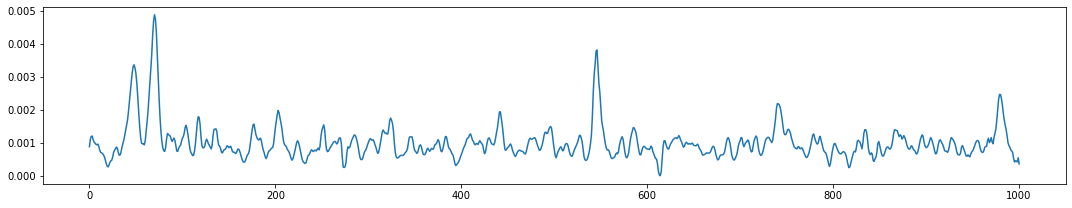

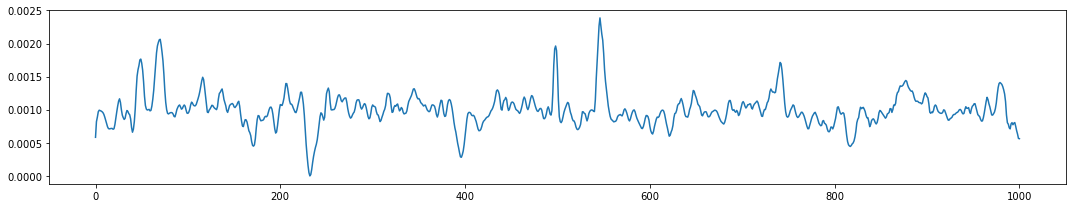

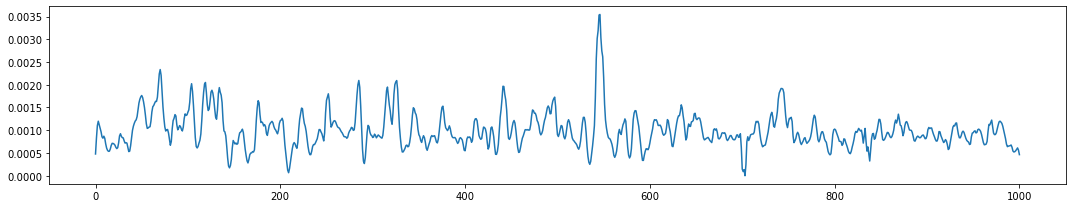

In [6]:
for observation in earData:
    plt.figure(figsize=(15,3))
    plt.plot(observation)

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve

In [10]:
n_components = .99
pca = PCA(n_components=n_components)

In [11]:
pca.fit(earData)

PCA(n_components=0.99)

In [13]:
pca.explained_variance_ratio_

array([0.43809996, 0.1751886 , 0.07025673, 0.04834929, 0.04620687,
       0.03503791, 0.03123294, 0.02605345, 0.02262236, 0.02094747,
       0.01709105, 0.01432606, 0.01342245, 0.01194323, 0.0102646 ,
       0.00747765, 0.00499504])

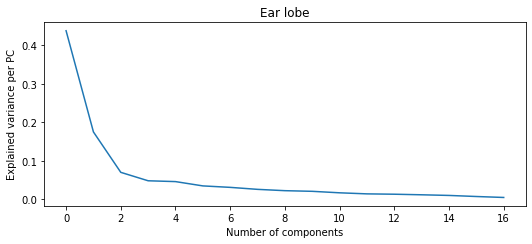

In [62]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Ear lobe')
plt.xlabel('Number of components')
plt.ylabel('Explained variance per PC')
plt.savefig('exp_variance/earData.pdf')
plt.show()

In [14]:
X_pca = pca.fit_transform(earData)

In [15]:
X_pca

array([[ 5.07212774e-03,  3.80010383e-03, -2.35533958e-03,
         9.12091347e-04,  5.75080427e-04,  3.32163094e-03,
         2.19241164e-03,  2.60997987e-04,  8.16951888e-04,
        -1.53870096e-03,  2.55389332e-03, -6.46295623e-04,
        -8.20289500e-04,  3.57812269e-04, -1.11907734e-04,
        -4.33412331e-04,  1.27593663e-04],
       [-4.71133555e-03,  1.69133775e-04,  4.35906547e-03,
         3.50726061e-03,  1.89212131e-03, -1.98044500e-03,
        -1.53364493e-03,  1.41420896e-04, -3.25084125e-05,
        -6.64827350e-04,  1.15192155e-03, -3.29048799e-04,
        -3.31174332e-05,  2.07736763e-03, -1.42434940e-04,
        -3.34316707e-04,  4.15615965e-04],
       [-7.62631517e-04,  1.15091726e-03, -2.28830436e-05,
         1.93866866e-03,  7.00332110e-05,  1.20145504e-03,
        -6.23262893e-04, -1.71895723e-03, -1.03662367e-03,
         1.71721623e-03,  6.28606233e-04,  2.90029431e-03,
        -1.22250704e-03, -3.09170858e-04,  1.00704831e-03,
         6.67865225e-04,  5.6

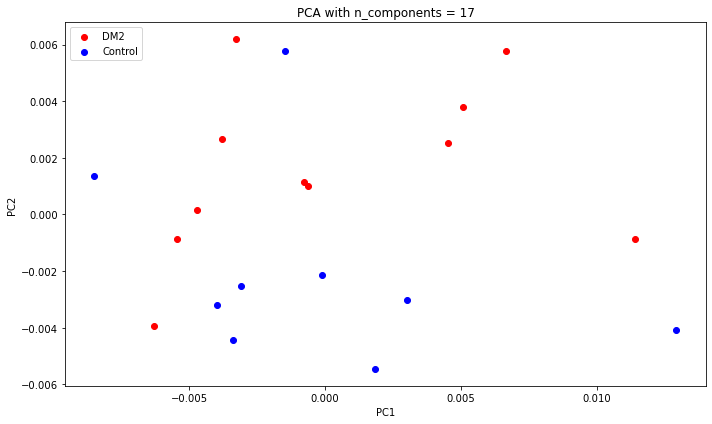

In [55]:
i = 0
j = 1

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, i][:11], X_pca[:, j][:11], c='red')
plt.scatter(X_pca[:, i][11:], X_pca[:, j][11:], c='blue')
plt.legend(['DM2', 'Control'], loc="upper left")
plt.title(f'PCA with n_components = {pca.n_components_}')

plt.xlabel(f'PC{i + 1}')
plt.ylabel(f'PC{j + 1}')
plt.savefig('plot/pca_2.pdf', bbox_inches='tight')
plt.show()

In [ ]:
plt.plot()
plt.show()

In [18]:
target = pd.read_csv('matlab_raman_preprocessed copy/earData.csv')['has_DM2']
target

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: has_DM2, dtype: float64

In [19]:
from sklearn.model_selection import KFold, StratifiedKFold

In [65]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [67]:
for train, test in kf.split(X_pca):
    print("%s %s" % (train, test))

TypeError: split() missing 1 required positional argument: 'y'

In [68]:
scores = []
best_svc = SVC(kernel='rbf', probability=True)
for train_index, test_index in kf.split(X_pca):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], target[train_index], target[test_index]
    best_svc.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(best_svc, X_test, y_test)
    scores.append(best_svc.score(X_test, y_test))

TypeError: split() missing 1 required positional argument: 'y'

In [49]:
scores

[0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0]

In [24]:
best_svc.support_vectors_

array([[-1.10253604e-04, -2.12592873e-03, -3.36587985e-04,
         1.87545517e-03, -9.30178861e-05, -2.29738000e-04,
        -1.51522323e-03, -1.28952531e-03,  2.80702939e-03,
        -1.34528295e-03, -1.72949668e-03, -4.52256446e-04,
        -2.08246190e-03, -1.29733202e-03, -4.98045845e-04,
        -2.10668827e-04,  1.05476044e-04],
       [-3.08144394e-03, -2.52049829e-03, -2.11249039e-03,
         1.04514989e-03, -1.25688499e-03,  1.91886006e-04,
         8.15309645e-04, -8.21852563e-04,  1.00369442e-03,
        -1.91766918e-03, -8.26353730e-04,  1.87251558e-03,
         2.58121771e-03,  4.48262641e-04,  2.19237719e-05,
        -8.21966565e-04, -6.27716900e-05],
       [-8.48017579e-03,  1.35409933e-03,  6.57185570e-04,
        -8.93035873e-04, -1.24427782e-03, -1.72408883e-03,
         9.12880923e-04, -1.12417373e-04,  2.77543331e-03,
         2.22782489e-03,  2.04437861e-03, -2.24413380e-04,
         8.54550212e-04, -1.14121478e-03, -4.06928772e-04,
         2.73128451e-04, -4.3

In [63]:
roc_auc_score(target, best_svc.predict_proba(X_pca)[:, 1])

# roc_auc_score(target, best_svc.decision_function(X_pca))

0.0

FOLD 1 Test set
y_test : [1. 0.] 

FOLD 2 Test set
y_test : [1. 1.] 

FOLD 3 Test set
y_test : [0. 0.] 

FOLD 4 Test set
y_test : [1. 0.] 

FOLD 5 Test set
y_test : [1. 1.] 

FOLD 6 Test set
y_test : [1. 0.] 

FOLD 7 Test set
y_test : [1. 0.] 

FOLD 8 Test set
y_test : [1. 1.] 

FOLD 9 Test set
y_test : [1. 1.] 

FOLD 10 Test set
y_test : [0. 1.] 



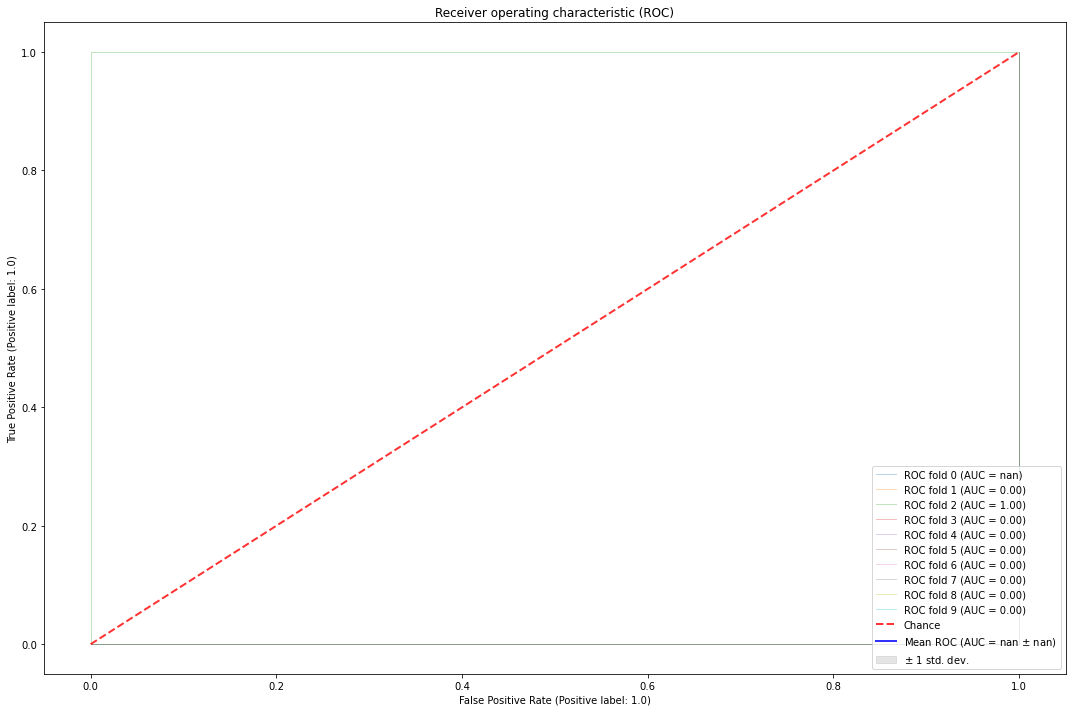

In [69]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
classifier = SVC(kernel='rbf', probability=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

X = X_pca
y = target

fig, ax = plt.subplots(figsize=(15,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    print(f'FOLD {i+1} Test set')
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    print(f'y_test : {classifier.predict(X[test])} \n')

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic (ROC)")
ax.legend(loc="lower right")
plt.savefig('plot/experiments/stratified_kf.pdf')
plt.show()

In [70]:
mean_tpr

array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan,  1.])

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.82         9
         1.0       0.83      0.91      0.87        11

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20



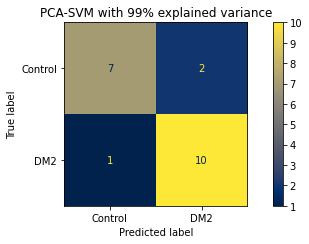

In [72]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print(classification_report(target, classifier.predict(X_pca)))
plot_confusion_matrix(classifier, X_pca, target, display_labels=['Control', 'DM2'], cmap='cividis')
plt.title('PCA-SVM with 99% explained variance')
plt.savefig('pca_confusion_matrix.pdf')
plt.show()

In [78]:
y_pred_proba = classifier.predict_proba(X_pca)[:, 1]

In [79]:
def flatten_np(array):    
    res = []
    for i in array:
        for j in i:
            res.append(j[1])

    return res

In [81]:
# y_pred_proba = flatten_np(y_pred_proba)

In [82]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1, name='SVM with 2-component PCA')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.savefig('plot/roc_auc_pca_2.pdf')

ValueError: Found input variables with inconsistent numbers of samples: [2, 20]